# Evaluation of the model

In [1]:
%matplotlib inline
from tensorflow import keras
import matplotlib.pyplot as plt
import csv
import numpy as np
FOLDER = "data/"

## Plot the loss accuracy curves

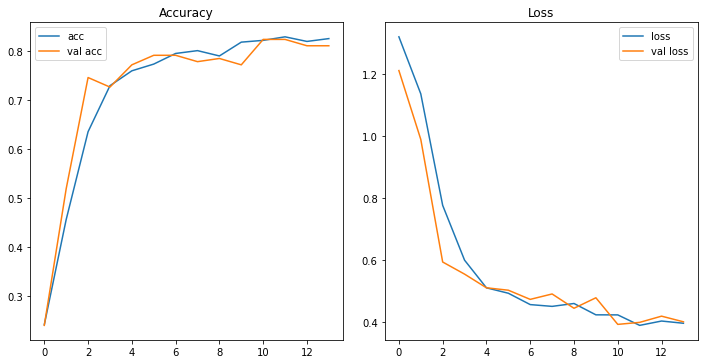

In [2]:
val_loss = []
loss = []
acc = []
val_acc = []

with open('history/historyCNN.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')
        eliminator = 0
        for row in csv_reader:
            if eliminator!=0:    
                acc.append(float(row[1]))
                loss.append(float(row[2]))
                val_acc.append(float(row[3]))
                val_loss.append(float(row[4]))
            eliminator = eliminator + 1

fig, axs = plt.subplots(1,2, figsize = (10,5))
fig.tight_layout()
axs[0].plot(acc, label = "acc")
axs[0].plot(val_acc, label = "val acc")
axs[0].set_title("Accuracy")
axs[0].legend()

axs[1].plot(loss, label = "loss")
axs[1].plot(val_loss, label = "val loss")
axs[1].set_title("Loss")
axs[1].legend()


## Models comparison

In [4]:
model_morph = keras.models.load_model("models/CNN_morphology")
model = keras.models.load_model("models/CNN")

2022-05-26 01:27:53.137516: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
from utils.helper import read_data, morphology
data_empty = read_data(FOLDER + "empty.csv")
data_1p = read_data(FOLDER + "1p.csv")
data_2p = read_data(FOLDER + "2p.csv")
data_3p = read_data(FOLDER + "3p.csv")

In [6]:
LENGTH_EMPTY = data_empty.shape[0]
LENGTH_1P = data_1p.shape[0]
LENGTH_2P = data_2p.shape[0]
LENGTH_3P = data_3p.shape[0]

In [7]:
data_empty_summed = np.abs(np.sum(data_empty, axis=1)) 
data_1p_summed = np.abs(np.sum(data_1p, axis=1))
data_2p_summed = np.abs(np.sum(data_2p, axis=1))
data_3p_summed = np.abs(np.sum(data_3p, axis=1))

/Users/kostiantynlavronenko/Desktop/Eestech/hackathon-milan/submission/code/utils/helper.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  return data_real.astype(float)


In [8]:
data_empty_summed[:, :, 32, :] = 0
data_1p_summed[:, :, 32, :] = 0
data_2p_summed[:, :, 32, :] = 0
data_3p_summed[:, :, 32, :] = 0

In [9]:
data_empty_morph =  morphology(data_empty_summed)
data_1p_morph =  morphology(data_1p_summed)
data_2p_morph =  morphology(data_2p_summed)
data_3p_morph =  morphology(data_3p_summed)

In [10]:
data_0_m = np.moveaxis(data_empty_morph, 1,3)
data_1_m = np.moveaxis(data_1p_morph, 1,3)
data_2_m = np.moveaxis(data_2p_morph, 1,3)
data_3_m = np.moveaxis(data_3p_morph, 1,3)

data_0 = np.moveaxis(data_empty_summed, 1,3)
data_1 = np.moveaxis(data_1p_summed, 1,3)
data_2 = np.moveaxis(data_2p_summed, 1,3)
data_3 = np.moveaxis(data_3p_summed, 1,3)

In [11]:
data_tot = np.concatenate((data_0, data_1, data_2, data_3), axis=0)
data_tot_m = np.concatenate((data_0_m, data_1_m, data_2_m, data_3_m), axis=0)

In [14]:
labels_empty = np.zeros(LENGTH_EMPTY)
labels_1p = np.ones(LENGTH_1P)
labels_2p = np.ones(LENGTH_2P) * 2
labels_3p = np.ones(LENGTH_3P) * 3
labels = np.concatenate((labels_empty, labels_1p, labels_2p, labels_3p), axis=0)
test_labels_one_hot = np.eye(4)[labels.astype(int)]

# Normal model

In [15]:
loss, aacuracy = model.evaluate(data_tot, test_labels_one_hot)
print(f"Loss: {loss}")
print(f"Accuracy: {aacuracy}")

8/8 [==============================] - 0s 9ms/step - loss: 0.4904 - accuracy: 0.8125
Loss: 0.4904274642467499
Accuracy: 0.8125


# Morphology model

In [17]:
loss, aacuracy = model_morph.evaluate(data_tot_m, test_labels_one_hot)
print(f"Loss: {loss}")
print(f"Accuracy: {aacuracy}")

8/8 [==============================] - 0s 9ms/step - loss: 0.5576 - accuracy: 0.8000
Loss: 0.5575905442237854
Accuracy: 0.800000011920929
